In [67]:
# Importing necessary modules

# Data Analysis 

import numpy as np
import pandas as pd

# Graphical visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [68]:
#Reading datasheet

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [69]:
#Displaying few rows of datasheet

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
#Checking dimension of datasheets

df_train.shape

(891, 12)

In [71]:
df_test.shape

(418, 11)

In [72]:
#Checking missing values of datasheet

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [74]:
#Describing numerical features

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
#Describing categorical features

df_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Adams, Mr. John",male,1601,B96 B98,S
freq,1,577,7,4,644


In [76]:
#Analyzing features with Survived rate

df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [77]:
df_train[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [78]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [79]:
df_train[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


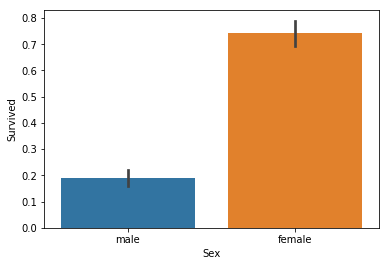

In [80]:
#Analyzing features by visual graph

sns.barplot(x='Sex', y='Survived', data=df_train)

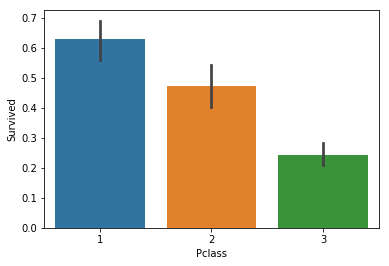

In [81]:
sns.barplot(x='Pclass', y='Survived', data=df_train)

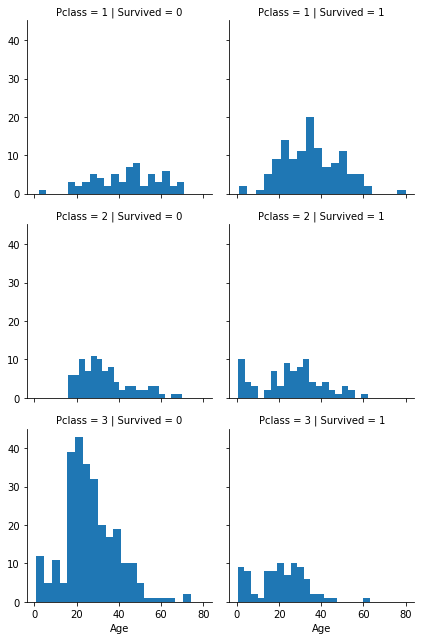

In [82]:
grid=sns.FacetGrid(df_train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)

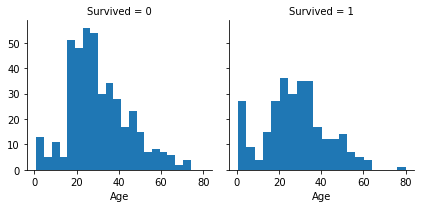

In [83]:
grid=sns.FacetGrid(df_train, col='Survived')
grid.map(plt.hist, 'Age', bins=20)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


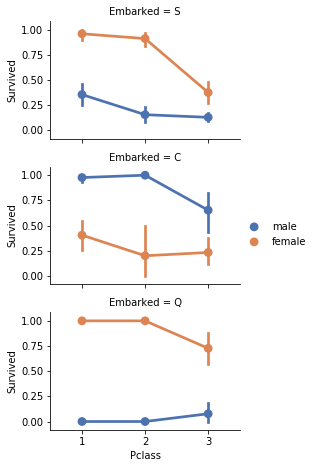

In [84]:
grid = sns.FacetGrid(df_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [85]:
# Wrangling Data(Removing Unwanted Features PassengerId and Ticket)

#df_train.drop('PassengerId', axis=1, inplace=True)  # [ If inplace is used then no need to use assign droped value to df_train or df_test ]
#df_test.drop('PassengerId', axis=1, inplace=True)

df_train = df_train.drop(['PassengerId','Ticket'], axis=1)   # [ If inplace is not used then we need to assign droped value to certain variable , here df_train and df_test is used]
df_test = df_test.drop(['Ticket'], axis=1)
combine=[df_train, df_test]

df_train.shape, df_test.shape

((891, 10), (418, 10))

In [86]:
# Extracting fore name of passengers 

for data in combine:
    data['Title'] = data['Name'].str.extract(' ([A-Z a-z]+)\.', expand=False)
    
df_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
Don               1
the Countess      1
Jonkheer          1
Ms                1
Capt              1
Mme               1
Sir               1
Name: Title, dtype: int64

In [87]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [88]:
# For Name giving numerical values to (mr,mrs,miss,dr,col,....etc)

for data in combine:
    data['Title'] = data['Title'].map({"Mr": 0, "Miss": 1, "Mrs": 2,"Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3})

df_train.head() 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0.0


In [89]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,2


In [90]:
df_train[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
2,2.0,0.792000
1,1.0,0.697802
3,3.0,0.515152
0,0.0,0.156673


In [91]:
# Removing unwamted features Name and Cabin

df_train = df_train.drop(['Name','Cabin'], axis=1)
df_test = df_test.drop(['Name','Cabin'], axis=1)
combine=[df_train, df_test]

df_train.shape, df_test.shape

((891, 9), (418, 9))

In [92]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0.0
1,1,1,female,38.0,1,0,71.2833,C,2.0
2,1,3,female,26.0,0,0,7.9250,S,1.0
3,1,1,female,35.0,1,0,53.1000,S,2.0
4,0,3,male,35.0,0,0,8.0500,S,0.0


In [93]:
#Changing Sex feature into numerical

for data in combine:
    data['Sex'] = data['Sex'].map( {'male':0, 'female':1} )
df_train.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,0.0
1,1,1,1,38.0,1,0,71.2833,C,2.0
2,1,3,1,26.0,0,0,7.9250,S,1.0
3,1,1,1,35.0,1,0,53.1000,S,2.0
4,0,3,0,35.0,0,0,8.0500,S,0.0


In [94]:
# Filling missing value(null values) of Age feature 
       
    # Since Age vs Survived graph is neither right nor left skewed, hence using interpolate to fill null spot
    
df_train = df_train.interpolate()
df_test = df_test.interpolate()

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,0.0
1,1,1,1,38.0,1,0,71.2833,C,2.0
2,1,3,1,26.0,0,0,7.9250,S,1.0
3,1,1,1,35.0,1,0,53.1000,S,2.0
4,0,3,0,35.0,0,0,8.0500,S,0.0


In [96]:
for data in combine:
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age']   = 2         # IF Age doesnot change to num Run this cell again. 
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age']   = 3      
    data.loc[ data['Age'] > 64, 'Age'] = 4
    
combine = [df_train, df_test]

df_train.head()  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,0.0
1,1,1,1,2.0,1,0,71.2833,C,2.0
2,1,3,1,1.0,0,0,7.9250,S,1.0
3,1,1,1,2.0,1,0,53.1000,S,2.0
4,0,3,0,2.0,0,0,8.0500,S,0.0


In [97]:
# Assingning null vaues of Embarked in train set only

df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [98]:
# Changing values of Embarked from alpha to num

for data in combine:
    data['Embarked'] = data['Embarked'].map( {'S':0, 'C':1, 'Q':2} ).astype(int)

df_train.head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,0.0
1,1,1,1,2.0,1,0,71.2833,1,2.0
2,1,3,1,1.0,0,0,7.9250,0,1.0
3,1,1,1,2.0,1,0,53.1000,0,2.0
4,0,3,0,2.0,0,0,8.0500,0,0.0
5,0,3,0,2.0,0,0,8.4583,2,0.0
6,0,1,0,3.0,0,0,51.8625,0,0.0


In [99]:
# Combining SibSp and Parch as a Family

for data in combine:
    data['Family'] = data['SibSp'] + data['Parch'] + 1

df_train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False )


,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [100]:
#Changing Family to Alone or not

for data in combine:
    data['Alone'] = 0
    data.loc[data['Family'] == 1, 'Alone'] = 1

df_train[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [101]:
# Removing SibSp, Parch and Family

df_train = df_train.drop(['Parch', 'SibSp', 'Family'], axis=1)
df_test = df_test.drop(['Parch', 'SibSp', 'Family'], axis=1)
combine = [df_train, df_test]

df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,1.0,7.2500,0,0.0,0
1,1,1,1,2.0,71.2833,1,2.0,0
2,1,3,1,1.0,7.9250,0,1.0,1
3,1,1,1,2.0,53.1000,0,2.0,0
4,0,3,0,2.0,8.0500,0,0.0,1


In [102]:
#There is one null value for Fare in test sheet

df_test['Fare'].interpolate()
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
Alone          0
dtype: int64

In [103]:
for data in combine:
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)

combine = [df_train, df_test]
    
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,892,3,0,2.0,0,2,0,1
1,893,3,1,2.0,0,0,2,0
2,894,2,0,3.0,1,2,0,1
3,895,3,0,1.0,1,0,0,1
4,896,3,1,1.0,1,0,2,0


In [104]:
# Training a Model and Predicting the required Solution
# MACHINE LEARNING 


X_train = df_train.drop('Survived', axis=1)
Y_train = df_train['Survived']

X_test = df_test.drop("PassengerId", axis=1).copy()     # copy() will prevent getting value of X_test while we want value of df_test. 

In [105]:
# Logistic Regression

Logreg = LogisticRegression()
Logreg.fit(X_train,Y_train)
pred = Logreg.predict(X_test)

acc_log = round(Logreg.score(X_train, Y_train) * 100, 2)
acc_log

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.7

In [106]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.0

In [107]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.8

In [108]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.54

In [109]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

78.11

In [110]:
# Evaluation/Testing


Result = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Linear SVC', 'Random Forest', 'KNN'],
    
    'Score': [acc_log, acc_gaussian, acc_linear_svc, acc_random_forest, acc_knn ]})

Result.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.54
0,Logistic Regression,80.70
2,Linear SVC,79.80
4,KNN,78.11
1,Naive Bayes,78.00


In [111]:
# Submission to Kaggle

submission = pd.DataFrame({ "PassengerId": df_test["PassengerId"], "Survived": Y_pred })

In [112]:
submission.to_csv('submission.csv', index=False)

In [115]:
submission = pd.read_csv('submission.csv')
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
